In [10]:
import math
from typing import List
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings(action='ignore', category=RuntimeWarning)


In [6]:
def plot_surprisals(words:List[str], surprisals_df):
    num_words = len(words)
    cols = min(num_words, 3)
    rows = math.ceil(num_words / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    axs = np.atleast_2d(axs)

    for i, word in enumerate(words):   
        word_data = surprisals_df[surprisals_df['Token'] == word]
        if word_data.empty:
            print(f'No data found for the word "{word}"')
            continue

        ax = axs[i//cols, i%cols]
        ax.plot(np.log10(word_data['Steps']), word_data['MeanSurprisal'])
        ax.set_title(f'"{word}"')
        ax.set_xlabel('BERT steps (log10)')
        ax.set_ylabel('Mean surprisal')
        ax.invert_yaxis()

    # Remove empty subplots
    for j in range(i+1, rows*cols):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.show()


In [7]:
wikitext_surprisals = '../sample_data/wikitext/bert_surprisals.txt'
chang_bergen_surprisals = '../r_code/tacl_data/lm_data/bert_surprisals.txt'
bert_surprisals = pd.read_csv(wikitext_surprisals, delimiter='\t')

In [8]:
bert_surprisals = (bert_surprisals
    .sort_values(['Token', 'Steps'])
    .groupby('Token')
    .apply(lambda x: x.assign(MeanSurprisalDiff = x['MeanSurprisal'].diff().fillna(0), 
                              StdevSurprisalDiff = x['StdevSurprisal'].diff().fillna(0)))
    .reset_index(drop=True))

bert_surprisals.insert(0, 'Token', bert_surprisals.pop('Token'))
bert_surprisals

,Token,Steps,MedianRank,MeanSurprisal,StdevSurprisal,Accuracy,NumExamples,MeanSurprisalDiff,StdevSurprisalDiff
0,a,0,3451,14.201838,0.386763,0.000000,512,0.000000,0.000000
1,a,20000,0,1.452711,1.769657,0.671875,512,-12.749128,1.382895
2,a,40000,0,1.050805,1.615932,0.773438,512,-0.401906,-0.153725
3,a,60000,0,0.964041,1.519993,0.789062,512,-0.086764,-0.095940
4,a,80000,0,0.926614,1.614722,0.787109,512,-0.037427,0.094729
...,...,...,...,...,...,...,...,...,...
7129,your,1600000,1,1.894058,2.084364,0.461538,13,-0.144634,0.085364
7130,your,1700000,0,1.733878,1.960023,0.615385,13,-0.160180,-0.124341
7131,your,1800000,0,1.719849,2.018352,0.692308,13,-0.014029,0.058329
7132,your,1900000,0,1.761835,2.017625,0.692308,13,0.041987,-0.000728


In [116]:
# def plot_df(word, df):
#     word_data = df[df['Token'] == word]
#     word_data.plot(x='Steps', y='MeanSurprisal', logx=True, title=f'"{word}"').set_ylim(df['MeanSurprisal'].max(), df['MeanSurprisal'].min())


# plot_df('your', bert_surprisals)

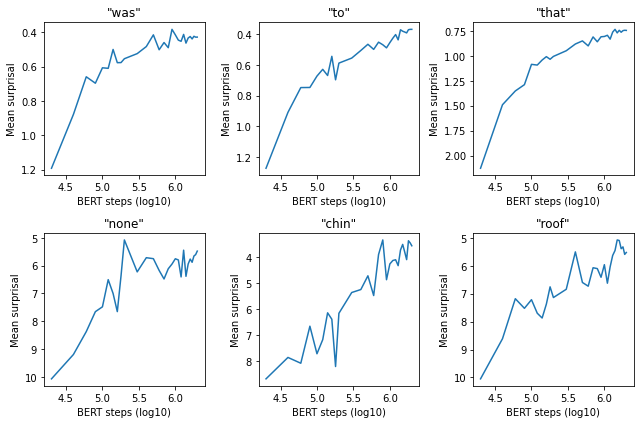

In [11]:
# Most vs least frequent words

frequent = bert_surprisals[bert_surprisals['NumExamples'] == 512]
non_frequent = bert_surprisals[bert_surprisals['NumExamples'] == 8]

plot_surprisals(frequent['Token'].drop_duplicates().sample(3).tolist() + non_frequent['Token'].drop_duplicates().sample(3).tolist(), bert_surprisals)

In [14]:
# for each step, average surprisal across all words

bert_surprisals.groupby('Steps')

In [12]:
# plot_surprisals(bert_surprisals['Token'].drop_duplicates().tolist(), bert_surprisals)

In [13]:
# Top 5 highest absolute diffs

highest_abs_diffs = bert_surprisals.loc[bert_surprisals['MeanSurprisalDiff'].abs().nlargest(5).index]
highest_abs_diffs

,Token,Steps,MedianRank,MeanSurprisal,StdevSurprisal,Accuracy,NumExamples,MeanSurprisalDiff,StdevSurprisalDiff
6004,the,20000,0,0.781342,1.324811,0.886719,512,-15.236831,0.945859
6613,was,20000,0,1.192383,1.659401,0.789062,512,-14.026222,1.327233
3481,is,20000,0,1.775125,2.488918,0.690141,426,-13.900096,2.059086
610,be,20000,0,0.894825,1.832280,0.876133,331,-13.769206,1.415900
1799,did,20000,0,1.840310,2.702644,0.710526,114,-13.755656,2.364045
